# Chapter 10 - Introduction to Artificial Neural Networks with Keras

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

ERROR:root:Line magic function `%tensorflow_version` not found.
/Users/dongdongdongdong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Perceptrons


*Note:* we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()

X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

In [4]:
per_clf = Perceptron(max_iter=1000,
                     tol=1e-3,
                     random_state=42)

In [5]:
per_clf.fit(X, y)

Perceptron(random_state=42)

In [6]:
y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

## Building an Image Classifier using the Sequential API

First let's import TensorFlow and Keras.

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
tf.__version__

'2.0.0-alpha0'

In [12]:
keras.__version__

'2.2.4-tf'

### Using Keras to load the dataset:


Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [13]:
fashion_mnist = keras.datasets.fashion_mnist

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [15]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [16]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a *validation set* and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [18]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'` color map:

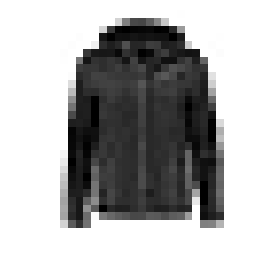

In [19]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [20]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [23]:
X_valid.shape

(5000, 28, 28)

In [24]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


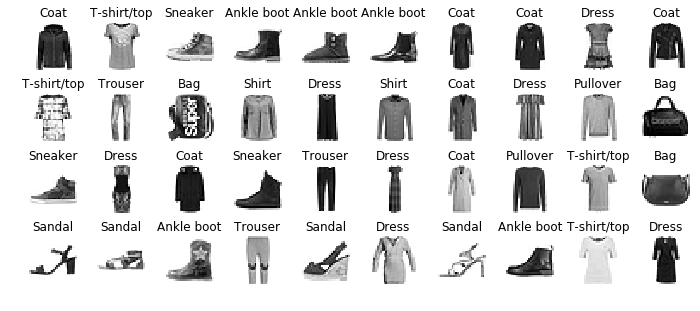

In [26]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Creating the model using the Sequential API:

In [27]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [28]:
keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

We can also pass a list of layers when creating the Sequential model:

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [30]:
model.layers

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


We can easily get a model's list of layers, to fetch a layer by its index, or we can fetch it by name:

In [38]:
model.layers

In [39]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [40]:
model.get_layer(hidden1.name) is hidden1

True

In [41]:
weights, biases = hidden1.get_weights()

In [42]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [43]:
weights.shape

(784, 300)

In [45]:
biases.shape

(300,)

### Compiling the model:

In [46]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Training and evaluating the model:

In [47]:
history = model.fit(X_train, y_train, 
                    epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 64us/sample - loss: 1.4948 - accuracy: 0.5757 - val_loss: 1.0042 - val_accuracy: 0.7168
Epoch 2/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.8690 - accuracy: 0.7319 - val_loss: 0.7549 - val_accuracy: 0.7616
Epoch 3/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.7176 - accuracy: 0.7667 - val_loss: 0.6611 - val_accuracy: 0.7890
Epoch 4/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.6459 - accuracy: 0.7891 - val_loss: 0.6049 - val_accuracy: 0.8094
Epoch 5/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.5995 - accuracy: 0.8039 - val_loss: 0.5691 - val_accuracy: 0.8186
Epoch 6/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.5673 - accuracy: 0.8131 - val_loss: 0.5432 - val_accuracy: 0.8240
Epoch 7/30
55000/55000 [==============================] -

In [48]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 55000,
 'steps': None,
 'verbose': 0}

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Ploting the learning curve:

In [51]:
import pandas as pd

Saving figure keras_learning_curves_plot


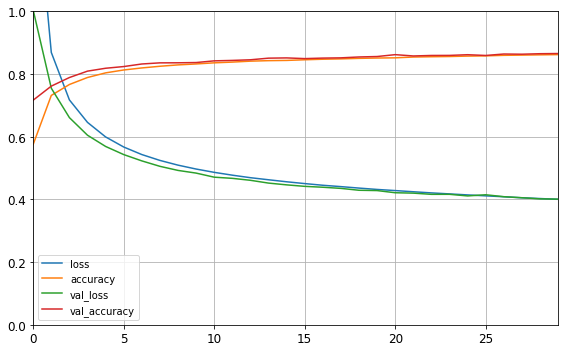

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

save_fig("keras_learning_curves_plot")
plt.show()

### Testing:

In [53]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.4363 - accuracy: 0.8448


[0.4363243744850159, 0.8448]

### Making predictions:

In [54]:
X_new = X_test[:3]

In [56]:
y_proba = model.predict(X_new)
y_proba

array([[1.7174259e-05, 3.1805957e-06, 2.6783138e-05, 1.5158183e-05,
        1.6140388e-05, 1.3407007e-01, 6.2239946e-05, 1.7430557e-01,
        4.8054522e-03, 6.8667835e-01],
       [2.2854950e-04, 1.4350786e-05, 9.2438400e-01, 2.9728430e-05,
        2.1758821e-02, 1.2797761e-09, 5.3541578e-02, 7.4176819e-12,
        4.2997028e-05, 2.8014671e-10],
       [1.5154368e-05, 9.9991953e-01, 2.7078274e-06, 8.2685610e-06,
        5.3540465e-05, 5.5628391e-10, 3.7463391e-08, 6.1454834e-11,
        8.8709345e-07, 1.1923624e-09]], dtype=float32)

In [61]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.134, 0.   , 0.174, 0.005,
        0.687],
       [0.   , 0.   , 0.924, 0.   , 0.022, 0.   , 0.054, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [62]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [63]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [64]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


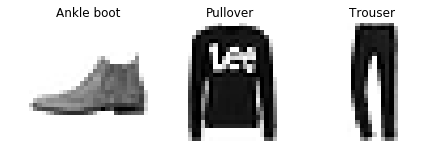

In [65]:
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## MLP for Regression tasks


Let's load, split and scale the *California housing dataset*:

In [66]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
housing = fetch_california_housing()

In [68]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target,
                                                              random_state=42)

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full,
                                                      random_state=42)

In [70]:
scaler = StandardScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [74]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [76]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.6343 - val_loss: 0.9361
Epoch 2/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.7053 - val_loss: 0.6556
Epoch 3/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6343 - val_loss: 0.6028
Epoch 4/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5974 - val_loss: 0.5631
Epoch 5/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5701 - val_loss: 0.5375
Epoch 6/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5474 - val_loss: 0.5165
Epoch 7/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5283 - val_loss: 0.5072
Epoch 8/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5130 - val_loss: 0.4806
Epoch 9/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4989 - val_l

In [77]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.4213


In [85]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

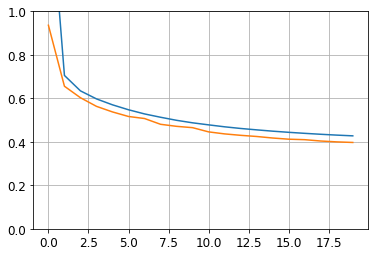

In [86]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [87]:
y_pred

array([[0.38745382],
       [1.6820507 ],
       [3.0960472 ]], dtype=float32)

## Building Complex Models using the Functional API

In [88]:
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [90]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [91]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [92]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 45us/sample - loss: 1.2544 - val_loss: 2.9415
Epoch 2/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6531 - val_loss: 0.8754
Epoch 3/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5873 - val_loss: 0.5529
Epoch 4/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5574 - val_loss: 0.5205
Epoch 5/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5343 - val_loss: 0.5399
Epoch 6/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5160 - val_loss: 0.4793
Epoch 7/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5004 - val_loss: 0.4655
Epoch 8/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4873 - val_loss: 0.4820
Epoch 9/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4761 - val_l

In [93]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.4029


In [94]:
y_pred = model.predict(X_new)

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [95]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name='output')(concat)

In [96]:
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output])

In [97]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [98]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [99]:
history = model.fit((X_train_A, X_train_B), y_train,
                    epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 45us/sample - loss: 1.7587 - val_loss: 0.8553
Epoch 2/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.7581 - val_loss: 0.6629
Epoch 3/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6578 - val_loss: 0.6031
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6022 - val_loss: 0.5644
Epoch 5/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5657 - val_loss: 0.5433
Epoch 6/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5386 - val_loss: 0.5137
Epoch 7/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5187 - val_loss: 0.5064
Epoch 8/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5029 - val_loss: 0.4802
Epoch 9/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4888 - val_l

In [100]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

5160/5160 [==============================] - 0s 16us/sample - loss: 0.4284


In [101]:
y_pred = model.predict((X_new_A, X_new_B))

Adding an auxiliary output for regularization:

In [102]:
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

In [104]:
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [105]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [106]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 65us/sample - loss: 2.1325 - main_output_loss: 1.9144 - aux_output_loss: 4.0952 - val_loss: 1.6650 - val_main_output_loss: 0.8893 - val_aux_output_loss: 8.6460
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.8870 - main_output_loss: 0.6932 - aux_output_loss: 2.6312 - val_loss: 1.4991 - val_main_output_loss: 0.6627 - val_aux_output_loss: 9.0269
Epoch 3/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.7421 - main_output_loss: 0.6078 - aux_output_loss: 1.9515 - val_loss: 1.4340 - val_main_output_loss: 0.5748 - val_aux_output_loss: 9.1665
Epoch 4/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.6766 - main_output_loss: 0.5683 - aux_output_loss: 1.6516 - val_loss: 1.3260 - val_main_output_loss: 0.5580 - val_aux_output_loss: 8.2378
Epoch 5/20
11610/11610 [==============================] - 1s 63us/s

In [107]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.4661 - main_output_loss: 0.4170 - aux_output_loss: 0.9089


In [108]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Using the Subclassing API to Build Dynamic Models

In [109]:
class WideAndDeepModel(keras.models.Model):
    
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [110]:
model = WideAndDeepModel(30, activation='relu')

In [111]:
model.compile(loss='mse', loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [112]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), 
                    epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 68us/sample - loss: 2.2914 - output_1_loss: 2.1797 - output_2_loss: 3.2961 - val_loss: 2.7823 - val_output_1_loss: 2.0251 - val_output_2_loss: 9.5972
Epoch 2/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.9834 - output_1_loss: 0.8680 - output_2_loss: 2.0213 - val_loss: 1.6646 - val_output_1_loss: 0.7720 - val_output_2_loss: 9.6976
Epoch 3/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.8264 - output_1_loss: 0.7297 - output_2_loss: 1.6971 - val_loss: 1.4471 - val_output_1_loss: 0.6945 - val_output_2_loss: 8.2200
Epoch 4/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7616 - output_1_loss: 0.6749 - output_2_loss: 1.5418 - val_loss: 1.2658 - val_output_1_loss: 0.6380 - val_output_2_loss: 6.9158
Epoch 5/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7203 - output_1_loss: 0.

In [113]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

5160/5160 [==============================] - 0s 21us/sample - loss: 0.5847 - output_1_loss: 0.5197 - output_2_loss: 1.1695


In [114]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

## Saving and Restoring a Model

In [115]:
np.random.seed(42)
tf.random.set_seed(42)

In [116]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [117]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 48us/sample - loss: 1.8807 - val_loss: 0.7701
Epoch 2/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.6570 - val_loss: 0.7268
Epoch 3/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5932 - val_loss: 0.6569
Epoch 4/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5547 - val_loss: 0.5244
Epoch 5/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5269 - val_loss: 0.5068
Epoch 6/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5035 - val_loss: 0.5028
Epoch 7/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4852 - val_loss: 0.4924
Epoch 8/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4709 - val_loss: 0.4534
Epoch 9/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4578 - val_l

In [118]:
model.save("my_keras_model.h5")

In [119]:
model = keras.models.load_model("my_keras_model.h5")

In [120]:
model.predict(X_new)

array([[0.54925185],
       [1.6747888 ],
       [3.0483947 ]], dtype=float32)

In [121]:
model.save_weights("my_keras_weights.ckpt")

In [122]:
model.load_weights("my_keras_weights.ckpt")

## Using Callbacks during Training

In [123]:
keras.backend.clear_session()

In [124]:
np.random.seed(42)
tf.random.set_seed(42)

In [125]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [126]:
model.compile(loss="mse", 
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [127]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5',
                                            save_best_only=True)

In [128]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    callbacks=[checkpoint_cb])

Epoch 1/10
 9568/11610 [=======================>......] - ETA: 0s - loss: 2.1107

11610/11610 [==============================] - 0s 33us/sample - loss: 1.8807
Epoch 2/10
10848/11610 [===========================>..] - ETA: 0s - loss: 0.6615

11610/11610 [==============================] - 0s 33us/sample - loss: 0.6585
Epoch 3/10
11232/11610 [============================>.] - ETA: 0s - loss: 0.5910

11610/11610 [==============================] - 0s 32us/sample - loss: 0.5905
Epoch 4/10
10304/11610 [=========================>....] - ETA: 0s - loss: 0.5458

11610/11610 [==============================] - 0s 31us/sample - loss: 0.5555
Epoch 5/10
10720/11610 [==========================>...] - ETA: 0s - loss: 0.5266

11610/11610 [==============================] - 0s 29us/sample - loss: 0.5262
Epoch 6/10
10144/11610 [=========================>....] - ETA: 0s - loss: 0.5088

11610/11610 [==============================] - 0s 35us/sample - loss: 0.5037
Epoch 7/10
11488/11610 [============================>.] - ETA: 0s - loss: 0.4841

11610/11610 [==============================] - 0s 27us/sample - loss: 0.4851
Epoch 8/10
11072/11610 [===========================>..] - ETA: 0s - loss: 0.4740

11610/11610 [==============================] - 0s 28us/sample - loss: 0.4701
Epoch 9/10
10848/11610 [===========================>..] - ETA: 0s - loss: 0.4587

11610/11610 [==============================] - 0s 28us/sample - loss: 0.4576
Epoch 10/10
 9920/11610 [========================>.....] - ETA: 0s - loss: 0.4446

11610/11610 [==============================] - 0s 25us/sample - loss: 0.4479


In [129]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

In [130]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 22us/sample - loss: 0.4379


In [131]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [132]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [133]:
history = model.fit(X_train, y_train, 
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4395 - val_loss: 0.4119
Epoch 2/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4321 - val_loss: 0.4045
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4258 - val_loss: 0.3991
Epoch 4/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4206 - val_loss: 0.3931
Epoch 5/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4157 - val_loss: 0.3901
Epoch 6/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4117 - val_loss: 0.3861
Epoch 7/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4078 - val_loss: 0.3854
Epoch 8/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4043 - val_loss: 0.3793
Epoch 9/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.401

In [134]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 19us/sample - loss: 0.3387


### Customer callback:

In [135]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [136]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
10400/11610 [=========================>....] - ETA: 0s - loss: 0.3353
val/train: 0.98
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3384 - val_loss: 0.3333


## Using TensorBoard for Visualization

In [137]:
root_logdir = os.path.join(os.curdir, 'my_logs')

In [138]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [139]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_07_21-23_02_32'

In [140]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [141]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [142]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [143]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 117us/sample - loss: 1.8807 - val_loss: 0.7701
Epoch 2/30
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6570 - val_loss: 0.7268
Epoch 3/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5932 - val_loss: 0.6569
Epoch 4/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5547 - val_loss: 0.5244
Epoch 5/30
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5269 - val_loss: 0.5068
Epoch 6/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5035 - val_loss: 0.5028
Epoch 7/30
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4852 - val_loss: 0.4924
Epoch 8/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4709 - val_loss: 0.4534
Epoch 9/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4578 - val_

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

    $ tensorboard --logdir=./my_logs --port=6006

You can then open your web browser to localhost:6006 and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [144]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR:root:Line magic function `%tensorboard` not found.


The tensorboard module is not an IPython extension.


In [146]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_07_21-23_04_38'

In [147]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [148]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [149]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [150]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5259 - val_loss: 0.4834
Epoch 2/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4069 - val_loss: 0.3912
Epoch 3/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3744 - val_loss: 7.5516
Epoch 4/30
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3656 - val_loss: 1.1554
Epoch 5/30
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3526 - val_loss: 0.4557
Epoch 6/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3459 - val_loss: 0.3200
Epoch 7/30
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3354 - val_loss: 0.3228
Epoch 8/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3328 - val_loss: 0.3086
Epoch 9/30
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3219 - val_l

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [151]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



## Fine-Tuning NN Hyperparameters

In [152]:
keras.backend.clear_session()

In [153]:
np.random.seed(42)
tf.random.set_seed(42)

In [154]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [155]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [157]:
keras_reg.fit(X_train, y_train,
              epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 45us/sample - loss: 1.0910 - val_loss: 21.1892
Epoch 2/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.7607 - val_loss: 4.8909
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5401 - val_loss: 0.5721
Epoch 4/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4752 - val_loss: 0.4433
Epoch 5/100
11610/11610 [==============================] - ETA: 0s - loss: 0.449 - 0s 39us/sample - loss: 0.4499 - val_loss: 0.4270
Epoch 6/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4348 - val_loss: 0.4165
Epoch 7/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4240 - val_loss: 0.4060
Epoch 8/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4166 - val_loss: 0.4030
Epoch 9/100
11610/11610 [==============================] - 0s 

In [158]:
mse_test = keras_reg.score(X_test, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.3504


In [159]:
y_pred = keras_reg.predict(X_new)

In [160]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning:** the following cell crashes at the end of training. This seems to be caused by Keras issue #13586, which was triggered by a recent change in Scikit-Learn. Pull Request #13598 seems to fix the issue, so this problem should be resolved soon.

In [161]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)